# CAPSTONE PROJECT
    #ONLINE PAYMENT FRAUD DETECTION DATASET CASE STUDY


## CASE STUDY
#BLOSSOM BANK ALSO KNOWN AS BB PLC IS A MULTINATIONAL FINANCIAL SERVICES GROUP, THAT OFFERS RETAIL AND INVETSMENT BANKING, PENSION MANAGEMENT, ASSES MANAGEMENT AND PAYMENT SERVICES, HEADQUARTERED IN LONDON, UK.

### PROBLEM
BLOSSOM BANK WANTS TO BUILD A MACHINE LEARNING MODEL TO PREDICT ONLINE PAYMENT FRAUD.

In [1]:
# Import python libraries for data manipulation and visualization
import pandas as pd
import seaborn as sns
import numpy as np

### Data Inspection

In [2]:
#load the given dataset
data = pd.read_csv('Online Payment Fraud Detection.csv')

In [3]:
#check the 1st 5 rows of the dataset
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [4]:
#check the 1st 5 rows of the dataset
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [5]:
#check the size of the data (no of columns and rows)
data.shape

(1048575, 10)

In [6]:
# check the statistical data like percentile, mean and std of the numerical values of the dataset
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [7]:
#check the statistical data in interger for better interpretation. Here we could see the min amount is 0 and max is 10m. Also, all dataset count are equal which means there is no null value
data.describe().astype(int)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575
mean,26,158666,874009,893808,978160,1114197,0
std,15,264940,2971750,3008271,2296780,2416593,0
min,1,0,0,0,0,0,0
25%,15,12149,0,0,0,0,0
50%,20,76343,16002,0,126377,218260,0
75%,39,213761,136642,174599,915923,1149807,0
max,95,10000000,38900000,38900000,42100000,42200000,1


In [8]:
#to show the datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [9]:
#iterate through the columns to check the null values
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

### ASSIGNING FRAUDLENT AND NON FRAUDLENT DATA TO A VARIABLE. 

In [10]:
#checking and assigning the non fraudulent data to a variable
non_fraud = data.loc[data['isFraud'] == 0]

In [11]:
#checking and assigning the fraudulent data to a variable
fraud = data.loc[data['isFraud'] == 1]

In [12]:
non_fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0


In [13]:
#counting the number of non fraudulent transaction
non_fraud.count()

step              1047433
type              1047433
amount            1047433
nameOrig          1047433
oldbalanceOrg     1047433
newbalanceOrig    1047433
nameDest          1047433
oldbalanceDest    1047433
newbalanceDest    1047433
isFraud           1047433
dtype: int64

In [14]:
len(non_fraud)

1047433

In [15]:
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
1047888,95,CASH_OUT,56745.14,C526144262,56745.14,0.0,C79051264,51433.88,108179.02,1
1048221,95,TRANSFER,33676.59,C732111322,33676.59,0.0,C1140210295,0.00,0.00,1
1048222,95,CASH_OUT,33676.59,C1000086512,33676.59,0.0,C1759363094,0.00,33676.59,1
1048323,95,TRANSFER,87999.25,C927181710,87999.25,0.0,C757947873,0.00,0.00,1


In [16]:
#counting the fraudulent transaction
fraud.count()

step              1142
type              1142
amount            1142
nameOrig          1142
oldbalanceOrg     1142
newbalanceOrig    1142
nameDest          1142
oldbalanceDest    1142
newbalanceDest    1142
isFraud           1142
dtype: int64

In [17]:
len(fraud)

1142

### EDA TO UNDERSTAND THE RELATIONSHIP BETWEEN THE VARIABLES

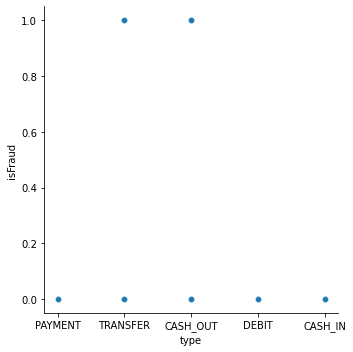

In [18]:
# Relationship plot between the isFraud column and type of transaction 
sns.relplot(x = 'type', y = 'isFraud', data = data)

#### from the output above and below, we can see that the fraud (1) channel is through the transfer and cash_out 

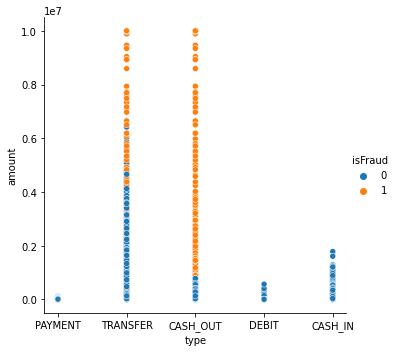

In [19]:
sns.relplot(x = 'type', y = 'amount', hue = 'isFraud', data = data)

<AxesSubplot:xlabel='amount', ylabel='oldbalanceDest'>

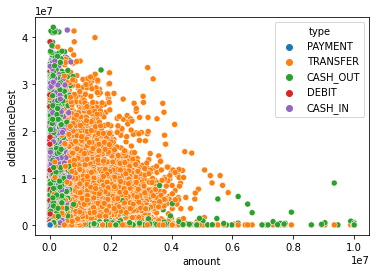

In [20]:
sns.scatterplot(data=data, x='amount', y='oldbalanceDest', hue='type')

####the old bal in the destination acct was between 1m to 4m through transfer majorly but new bal as shown below after the transaction as risen to 1m. This rise in transfer and cash out in the destination acct further validate these channel of fraud.

<AxesSubplot:xlabel='amount', ylabel='newbalanceDest'>

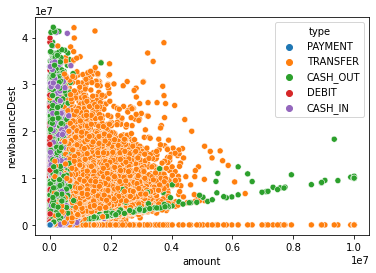

In [21]:
sns.scatterplot(data=data, x='amount', y='newbalanceDest', hue='type')

In [22]:
# correlation matrix of isFraud column
# isF = data.loc[data.step == 'isFraud']
# corr_mat_isF = isF.corr() 
# plot = sns.heatmap(isF.corr())

In [23]:
import matplotlib.pyplot as plt

# plt.matshow(data.corr())
# plt.figure(figsize=(10,8))
# plt.show()

### FEATURE ENGINEERING 

In [24]:
#convert 'type' categorical data column into numerical using onehot encoding

ycat = pd.get_dummies(data.type, prefix = 'ttype') 
print(ycat.head())

   ttype_CASH_IN  ttype_CASH_OUT  ttype_DEBIT  ttype_PAYMENT  ttype_TRANSFER
0              0               0            0              1               0
1              0               0            0              1               0
2              0               0            0              0               1
3              0               1            0              0               0
4              0               0            0              1               0


In [25]:
# print(y.tail())

In [26]:
# from sklearn.preprocessing import LabelBinarizer
# y = LabelBinarizer().fit_transform(data.type)
# y

In [27]:
# join the encoded avariable to the main data using concatenate fn

df = pd.concat([data, ycat], axis = 1)
print (df.shape)
df.head()

(1048575, 15)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,ttype_CASH_IN,ttype_CASH_OUT,ttype_DEBIT,ttype_PAYMENT,ttype_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [28]:
#drop the other categorical data coloumn not required for the machine learning
df.drop(['step', 'type', 'nameOrig', 'nameDest'], inplace = True, axis = 1)
df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,ttype_CASH_IN,ttype_CASH_OUT,ttype_DEBIT,ttype_PAYMENT,ttype_TRANSFER
0,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,0,1,0
1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,0,1,0
2,181.00,181.00,0.00,0.00,0.00,1,0,0,0,0,1
3,181.00,181.00,0.00,21182.00,0.00,1,0,1,0,0,0
4,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,132557.35,479803.00,347245.65,484329.37,616886.72,0,0,1,0,0,0
1048571,9917.36,90545.00,80627.64,0.00,0.00,0,0,0,0,1,0
1048572,14140.05,20545.00,6404.95,0.00,0.00,0,0,0,0,1,0
1048573,10020.05,90605.00,80584.95,0.00,0.00,0,0,0,0,1,0


In [29]:
cor = df.corr()
cor

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,ttype_CASH_IN,ttype_CASH_OUT,ttype_DEBIT,ttype_PAYMENT,ttype_TRANSFER
amount,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862,0.022341,0.071255,-0.047878,-0.397464,0.539278
oldbalanceOrg,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829,0.510853,-0.204549,-0.022109,-0.186253,-0.081976
newbalanceOrig,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438,0.530887,-0.214548,-0.022489,-0.190113,-0.087814
oldbalanceDest,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552,0.108309,0.130120,0.010704,-0.303959,0.130362
newbalanceDest,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495,0.057775,0.160136,0.007813,-0.329066,0.197706
isFraud,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000,-0.017363,0.010328,-0.002741,-0.023566,0.049279
ttype_CASH_IN,0.022341,0.510853,0.530887,0.108309,0.057775,-0.017363,1.000000,-0.391241,-0.043656,-0.375295,-0.157922
ttype_CASH_OUT,0.071255,-0.204549,-0.214548,0.130120,0.160136,0.010328,-0.391241,1.000000,-0.061772,-0.531032,-0.223456
ttype_DEBIT,-0.047878,-0.022109,-0.022489,0.010704,0.007813,-0.002741,-0.043656,-0.061772,1.000000,-0.059254,-0.024934
ttype_PAYMENT,-0.397464,-0.186253,-0.190113,-0.303959,-0.329066,-0.023566,-0.375295,-0.531032,-0.059254,1.000000,-0.214348


<AxesSubplot:>

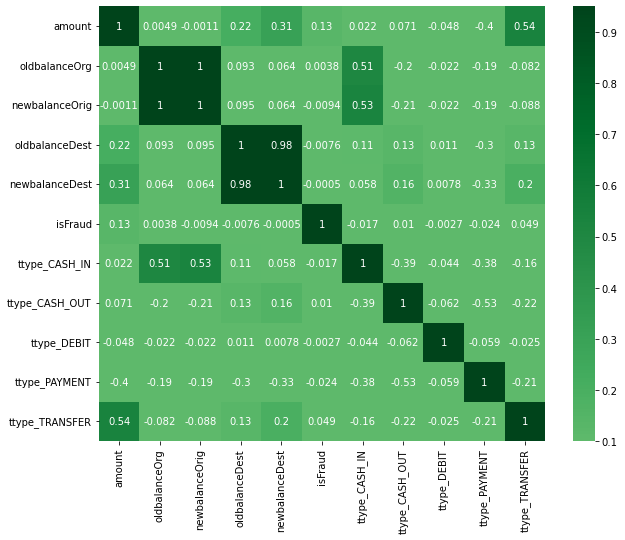

In [30]:
# to show correlation between oldbalOrg, newbalanceOrg and oldbalDest,newbalanceDest
plt.figure(figsize=(10,8))
sns.heatmap(data=cor, annot = True, cmap = 'Greens', center = 0, vmin = 0.1, vmax = 0.95)

### SPLITTING THE DATA FOR TEST/TRAIN

In [31]:
#for all independent variable
X = df.drop(['isFraud'],axis = 1)
X

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,ttype_CASH_IN,ttype_CASH_OUT,ttype_DEBIT,ttype_PAYMENT,ttype_TRANSFER
0,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1
3,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0
4,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1048570,132557.35,479803.00,347245.65,484329.37,616886.72,0,1,0,0,0
1048571,9917.36,90545.00,80627.64,0.00,0.00,0,0,0,1,0
1048572,14140.05,20545.00,6404.95,0.00,0.00,0,0,0,1,0
1048573,10020.05,90605.00,80584.95,0.00,0.00,0,0,0,1,0


In [32]:
# for dependent variable
y = df['isFraud']
y

0          0
1          0
2          1
3          1
4          0
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: isFraud, Length: 1048575, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

In [34]:
# x_train, x_test, y_train, y_test = train_test_split (x,y, test_size = 0.2, random_state = 1)

In [35]:
X_train, X_rem, y_train, y_rem = train_test_split (X,y, train_size = 0.8)

In [36]:
test_size = 0.5

In [37]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [38]:
print(X_train.shape), print(y_train.shape)

(838860, 10)
(838860,)


(None, None)

In [39]:
print(X_valid.shape), print(y_valid.shape)

(104857, 10)
(104857,)


(None, None)

In [40]:
print(X_test.shape), print(y_test.shape)

(104858, 10)
(104858,)


(None, None)

In [41]:
# x_train.shape

In [42]:
# x_test.shape

## MACHINE LEARNING ALGORITHMS & RESULTS
#Decision Tree and KNeighbor will be used for our machine learning

In [43]:
#creating the model - random forest
from sklearn.ensemble import RandomForestClassifier

In [44]:
# #Assign the random forest to a variable and indicating the number of trees you want to create
rf1 = RandomForestClassifier(n_estimators = 100)

In [45]:
#passing the training data set
rf1.fit(X_train,y_train)

RandomForestClassifier()

In [46]:
# prediction on test data
prediction_rf = rf1.predict(X_test)

In [47]:
rf_score = rf1.score(X_test,y_test)*100

In [48]:
# #to show how the model is doing
rf_score

99.95994583150546

In [49]:
# print(classification_report(rf_score, y_test))

In [50]:
#creating the model - kneighbor
from sklearn.neighbors import KNeighborsClassifier

In [51]:
K_m = KNeighborsClassifier()

In [52]:
#passing the training data set
K_m.fit(X_train,y_train)

KNeighborsClassifier()

In [53]:
# prediction on test data using KNeighbor
prediction_K_m1 = K_m.predict(X_test)

In [54]:
K_m_score = K_m.score(X_test,y_test)*100

In [55]:
# #to show how the model is doing
K_m_score

99.92656735776002

# ## Confusion Matrix

In [56]:
#import the confusion matrix from pandas library
from sklearn.metrics import confusion_matrix

In [57]:
#Generate confusion matrix 
cm = confusion_matrix (y_test, y_train,  labels = [0,1])
print ('Confussion Matrix: ')
print(cm)

ValueError: Found input variables with inconsistent numbers of samples: [104858, 838860]